In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Load the data
data = pd.read_csv('00- Dataset CSV_Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
print(data.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [5]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [6]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
encode = LabelEncoder()
data['Geography'] = encode.fit_transform(data['Geography'])

In [8]:
encodee = LabelEncoder()
data['Gender'] = encodee.fit_transform(data['Gender'])

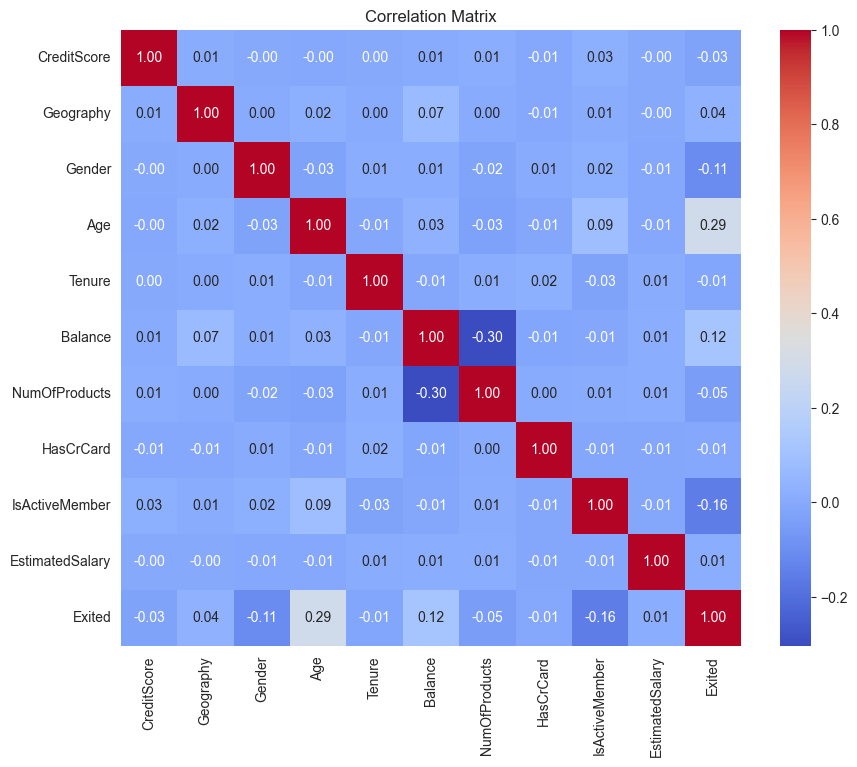

In [9]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
X = data.drop('Exited', axis=1)
y = data['Exited']

In [12]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [13]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = Sequential()

In [30]:
model.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1]))

/Users/marouandgh/IdeaProjects/Deep_learning/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.add(Dense(units=6, activation='relu'))

In [32]:
model.add(Dense(units=1, activation='sigmoid'))

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, batch_size=10, epochs=50)

Epoch 1/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - accuracy: 0.8008 - loss: 0.5953
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.7989 - loss: 0.5024
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.7900 - loss: 0.5143
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.7970 - loss: 0.5142
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.7984 - loss: 0.5033
Epoch 6/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.7965 - loss: 0.5060
Epoch 7/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8036 - loss: 0.4958
Epoch 8/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.7840 - loss: 0.5220
Epoch 9/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7941 - loss: 0.5088
Epoch 10/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.7919 - loss: 0.5131
Epoch 11/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.7979 - loss: 0.5039
Epoch 12/50
800/800 ━━━━━━━━━━━━

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.8026 - loss: 0.4971
Accuracy: 80.35%


In [44]:
results = pd.DataFrame({
    'Metric': ['Loss', 'Accuracy'],
    'Value': [loss, accuracy * 100]  
})
y_pred = (model.predict(X_test) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


In [45]:
confusion_df = pd.DataFrame(conf_matrix, 
                            index=['True Negative', 'True Positive'], 
                            columns=['Predicted Negative', 'Predicted Positive'])

print("\nMatrice de confusion :")
confusion_df


Matrice de confusion :


,Predicted Negative,Predicted Positive
True Negative,1607,0
True Positive,393,0


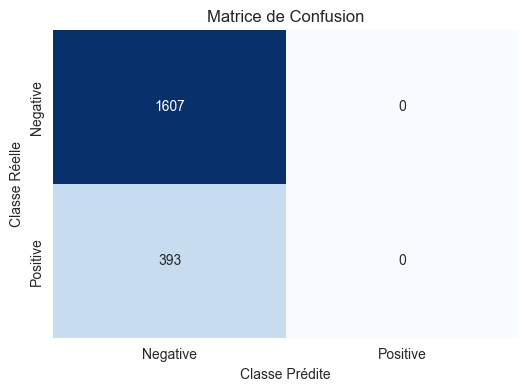

In [49]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Matrice de Confusion')
plt.ylabel('Classe Réelle')
plt.xlabel('Classe Prédite')
plt.show()

In [51]:
tn, fp, fn, tp = conf_matrix.ravel()

print(f"\nAnalyse de la matrice de confusion :")
print(f"Vrais Négatifs (TN) : {tn}")
print(f"Faux Positifs (FP) : {fp}")
print(f"Faux Négatifs (FN) : {fn}")
print(f"Vrais Positifs (TP) : {tp}")


Analyse de la matrice de confusion :
Vrais Négatifs (TN) : 1607
Faux Positifs (FP) : 0
Faux Négatifs (FN) : 393
Vrais Positifs (TP) : 0


In [52]:
report = classification_report(y_test, y_pred)
print("\nRapport de classification :")
print(report)


Rapport de classification :
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/Users/marouandgh/IdeaProjects/Deep_learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marouandgh/IdeaProjects/Deep_learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marouandgh/IdeaProjects/Deep_learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  